## Take a look at the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("movies_cleaned.csv")

In [3]:
df.head()

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,tagline,...,production_countries,year,month,date,spoken_languages,cast,director,exec_prod,screenplay,composer
0,237000000,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,...,"['United States of America', 'United Kingdom']",2009.0,12.0,10.0,"['English', 'Español']","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron,Laeta Kalogridis,James Cameron,James Horner
1,300000000,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",...,['United States of America'],2007.0,5.0,19.0,['English'],"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski,Mike Stenson,Ted Elliott,Hans Zimmer
2,245000000,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,...,"['United Kingdom', 'United States of America']",2015.0,10.0,26.0,"['Français', 'English', 'Español', 'Italiano',...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes,Callum McDougall,John Logan,Thomas Newman
3,250000000,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,...,['United States of America'],2012.0,7.0,16.0,['English'],"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan,Michael Uslan,Christopher Nolan,Hans Zimmer
4,260000000,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",...,['United States of America'],2012.0,3.0,7.0,['English'],"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton,NaN,Andrew Stanton,NaN


In [4]:
df.columns

Index(['budget', 'id', 'original_language', 'original_title', 'overview',
       'popularity', 'release_date', 'revenue', 'runtime', 'tagline', 'title',
       'vote_average', 'vote_count', 'genres', 'keywords',
       'production_companies', 'production_countries', 'year', 'month', 'date',
       'spoken_languages', 'cast', 'director', 'exec_prod', 'screenplay',
       'composer'],
      dtype='object')

A movie's popularity, revenue and vote average/count would be things that we are interested in predicting i.e. the response or dependent variable. Then the other variables would be our independent variables.  
  
For the sake of my analysis, I will focus specifically on revenue as the response variable.  

## Numeric predictor variables

In [5]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,month,date
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4802.000000,4802.000000,4802.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,2002.468763,6.795918,15.179509
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,12.414354,3.424187,8.645598
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1916.000000,1.000000,1.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,1999.000000,4.000000,8.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2005.000000,7.000000,15.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,2011.000000,10.000000,22.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000,12.000000,31.000000


Notice that the minimum values for budget, revenue and runtime are 0.  
It is impossible for a movie's runtime to be 0 minutes.  
It is possible, but highly unlikely that a movie's budget and a movie's revenue is 0.  
So in our analyses specifically looking at each variable, we will disregard values of 0.  

In [6]:
# check out how many 0 values there are. If there aren't that many, we don't need to remove them because they won't have a large impact on our analyses
len(df[df['budget']==0])
# over 1000, over a quarter of our dataset! we def need to remove budget 0 values

1037

In [7]:
len(df[df['revenue']==0])
# also need to remove revenue 0 values

1427

In [8]:
len(df[df['runtime']==0])
# there aren't that many, but the sake of consistency I'll remove runtime 0 values too

35

In [9]:
df_num = df[['budget','runtime','year','month','date']]

In [10]:
# replacing budget and runtime 0 values so they won't interfere with our graphs
df_num['budget'] = df_num['budget'].apply(lambda x: np.nan if x == 0 else x)
df_num['runtime'] = df_num['runtime'].apply(lambda x: np.nan if x == 0 else x)

C:\Users\jamie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jamie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Histograms  
Let's look at the distributions of our numeric variables

C:\Users\jamie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jamie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


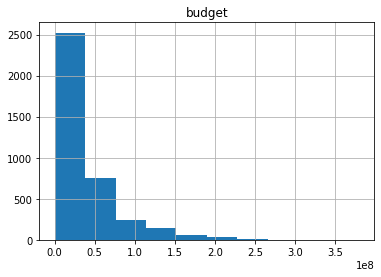

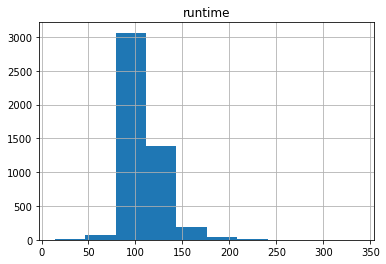

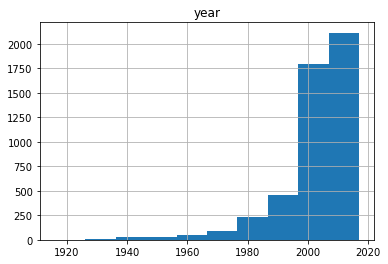

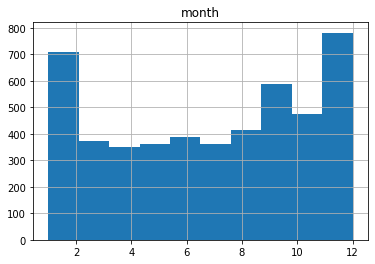

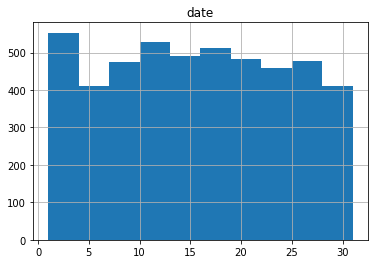

In [11]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.grid()
    plt.show()

From the histograms, 'budget', 'year' and 'month' do not follow a normal distribution. So we might need to normalize these variables before putting them in our model.

#### Boxplots

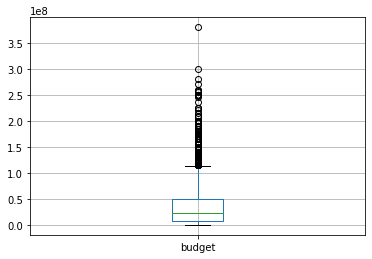

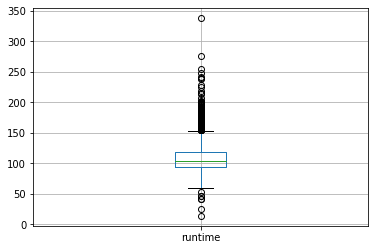

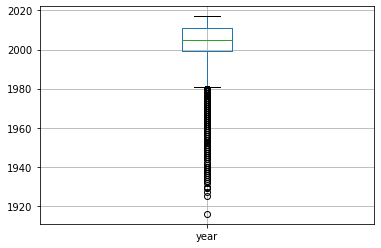

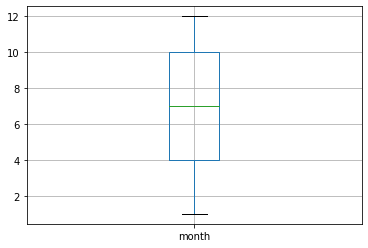

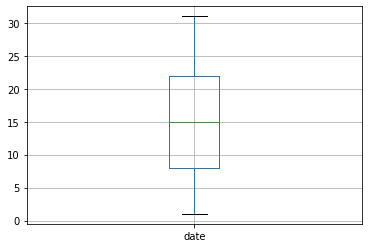

In [12]:
for i in df_num.columns:
    df_num.boxplot(column = i)
    plt.show()

- Most movies have a pretty low budget (below 50mil) but there are many very high outliers  
- Runtime ranges broadly from 0-350 minutes, with some low outliers and many high outliers  
- Year unexpectedly indicates that a lot of people are watching movies made more recently (during the 2000s) than old movies

#### Correlation Matrix and Plot

In [13]:
df[['revenue','budget','runtime','year','month','date']].corr()

,revenue,budget,runtime,year,month,date
revenue,1.000000,0.730823,0.251093,0.090192,0.055232,0.043518
budget,0.730823,1.000000,0.269851,0.168990,0.050281,0.041545
runtime,0.251093,0.269851,1.000000,-0.166849,0.157792,0.039128
year,0.090192,0.168990,-0.166849,1.000000,-0.060595,-0.016432
month,0.055232,0.050281,0.157792,-0.060595,1.000000,0.015063
date,0.043518,0.041545,0.039128,-0.016432,0.015063,1.000000


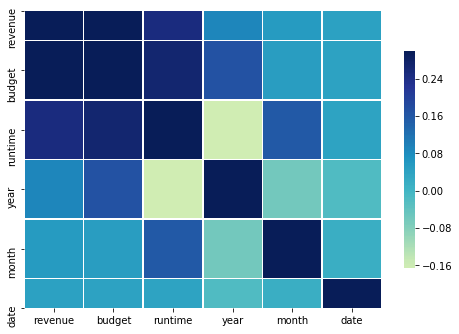

In [14]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[['revenue','budget','runtime','year','month','date']].corr(), cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation matrix, budget is strongly correlated with revenue and runtime is weakly correlated with revenue, indicating that these predictor variables have an effect on revenue.  

There are no two predictor variables that are highly correlated (corr > 0.7) with each other. This is a good sign that our predictor variables are independent.  
  
From the plots, we can see a movie's budget has some correlation with its runtime, meaning a movie with a higher budget tends to have a longer runtime. A negative correlation would indicate an inverse relationship, as in the case of year and runtime - However, the magnitude of correlation between year and runtime is so small there is little effect.

## Categorical Variables

In [15]:
df.columns

Index(['budget', 'id', 'original_language', 'original_title', 'overview',
       'popularity', 'release_date', 'revenue', 'runtime', 'tagline', 'title',
       'vote_average', 'vote_count', 'genres', 'keywords',
       'production_companies', 'production_countries', 'year', 'month', 'date',
       'spoken_languages', 'cast', 'director', 'exec_prod', 'screenplay',
       'composer'],
      dtype='object')

In [16]:
df_cat = df[['original_language','overview', 'tagline', 'title', 'genres', 'keywords', 'production_companies',
            'production_countries', 'spoken_languages', 'cast', 'director', 'exec_prod', 'screenplay',
             'composer']]

#### Wordclouds  
We have a few categorical variables where each value is a long text describing the movie. First let's create wordclouds to see which are the most common words in each of these variables.

In [17]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [18]:
def get_wordcloud(x):
    
    words = " ".join(x.astype(str))

    # remove punctuation and stop words
    words_filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(words)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            words_filtered.append(w.lower())

    text = " ".join([ele for ele in words_filtered])

    wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width = 800, height = 1500)
    wc.generate(text)

    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

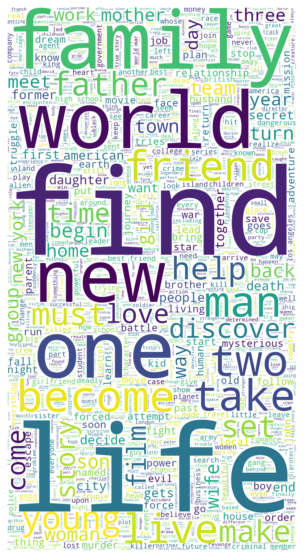

In [19]:
get_wordcloud(df_cat['overview'])

Interestingly, the most common words in the 'overview' column are life, find, family, world, new, one, followed by friend, become, live, help, man, love, discover, father.  

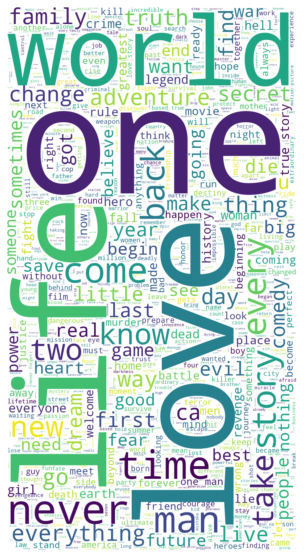

In [20]:
get_wordcloud(df_cat['tagline'].fillna(''))

Similar to the 'overview' column, the most common words in the 'tagline' column are life, love, world, one,  followed by never, time, come, back, story.  

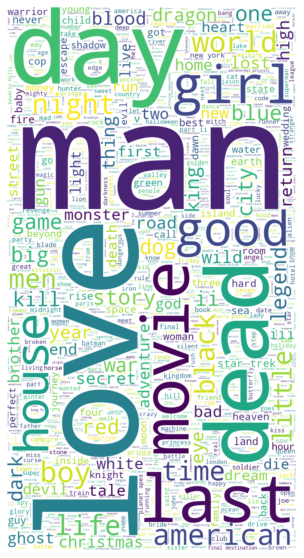

In [21]:
get_wordcloud(df_cat['title'])

As for 'titles', the most common words are love, man, day,  followed by dead, girl, movie, last, house.  

#### Barplots  
We have a couple of columns whose values are lists of words. For these columns, we will "unlist" the elements in the column then use value_counts() and barplots to look at the most common elements in the entire column.

In [22]:
df_cat_2 = df[['genres', 'keywords', 'production_companies', 'production_countries', 
               'spoken_languages', 'cast']]

graph of top 30 genres


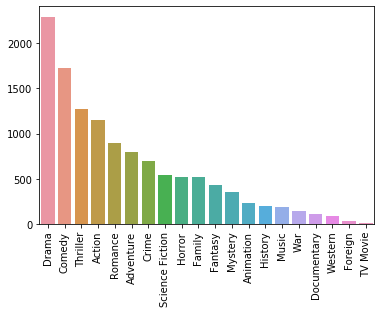

graph of top 30 keywords


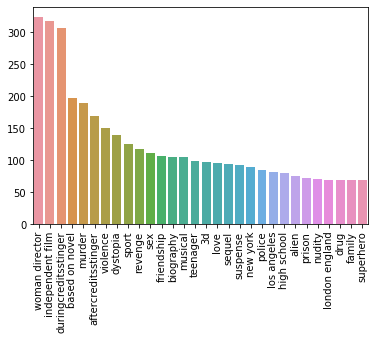

graph of top 30 production_companies


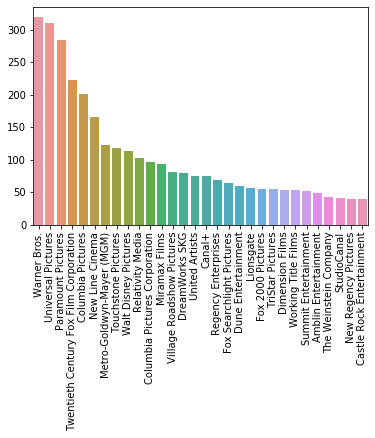

graph of top 30 production_countries


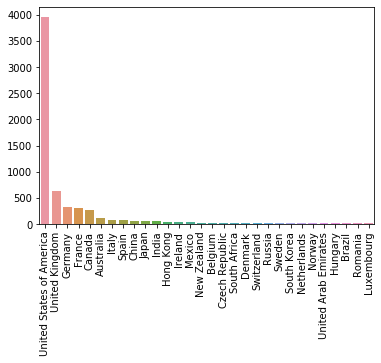

graph of top 30 spoken_languages


C:\Users\jamie\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jamie\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jamie\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jamie\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jamie\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jamie\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35486 missing from c

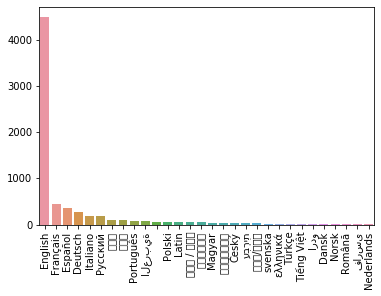

graph of top 30 cast


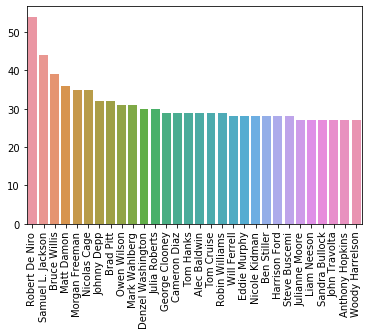

In [23]:
for i in df_cat_2.columns:
    
    cat_ser = df_cat[i].apply(eval)
    unlisted = pd.Series([x for _list in cat_ser for x in _list])

    print("graph of top 30 %s" % i)
    chart = sns.barplot(x = unlisted.value_counts()[:30].index, 
                        y = unlisted.value_counts()[:30])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

- (Note there are only 20 genres in our dataset). We see that the most popular genres are drama, comedy and thriller. Meanwhile, the least popular genres are western, foreign and TV movie.  
- Most common keywords include 'woman director', 'independent film' and 'based on novel'  
- Most common production companies are the well-known Warner Bros, Universal Pictures and Paramount Pictures  
- The USA has produced an overwhelmingly high proportion of movies in this dataset compared to the rest of the world. Some of the top movie production countries in Asia are China, Japan and India  
- An overwhelmingly high number of movies feature characters speaking in English, followed by French and Spanish  
- Most popular actors include Samuel L Jackson, Robert De Niro and Bruce Willis. It is interesting to note that out of the top 30 actors, there is only 1 female actor, Susan Sarandon

Lastly, we will look at the crew members:

In [24]:
df_cat_3 = df[['director', 'exec_prod', 'screenplay','composer']]

graph of top 30 directors


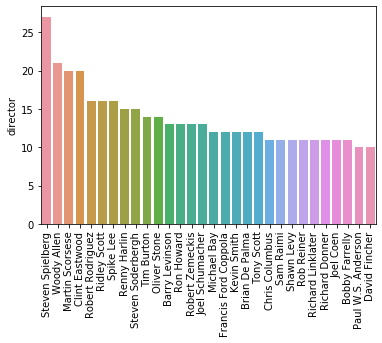

graph of top 30 exec_prods


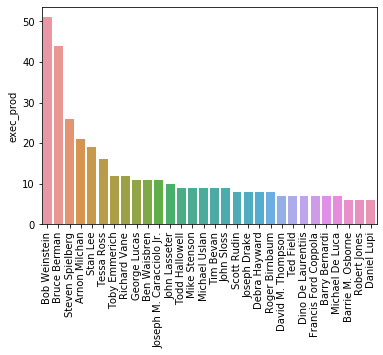

graph of top 30 screenplays


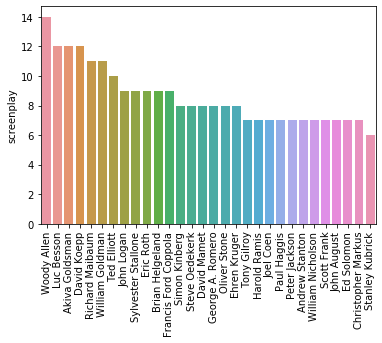

graph of top 30 composers


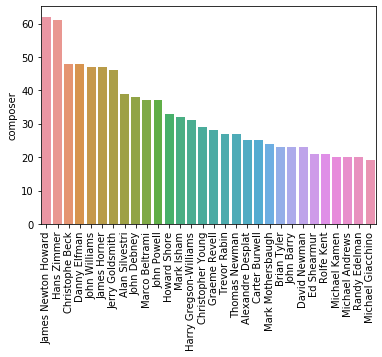

In [25]:
for i in df_cat_3.columns:
    print("graph of top 30 %ss" %i)
    chart = sns.barplot(x = df_cat_3[i].value_counts()[:30].index, 
                        y = df_cat_3[i].value_counts()[:30])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

We are seeing some very notable names in these barplots, such as Steven Spielberg, Woody Allen, Francis Ford Coppola and Hans Zimmer.

## How do our predictor variables affect a movie's revenue?

First let's take a look at our revenue column.

In [26]:
df.revenue.describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

We run into the earlier problem of revenue being 0.  
For this section specifically, since we are interested in seeing how our factors affect revenue, we will drop all observations with revenue equals 0.

In [27]:
df.drop(df[df['revenue'] == 0].index, inplace = True)
df = df.reset_index()

In [28]:
len(df)

3376

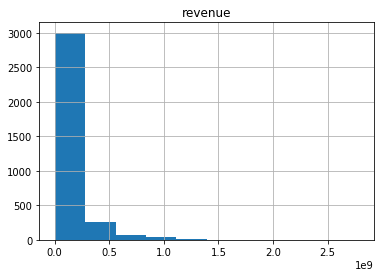

In [29]:
plt.hist(df['revenue'])
plt.title('revenue')
plt.grid()
plt.show()

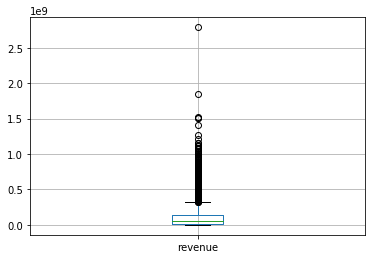

In [30]:
df.boxplot(column = 'revenue')

Revenue is extremely right-skewed, with many high outliers.

#### How did movie revenue change over the years?
Let's look at the average movie revenue per year:

C:\Users\jamie\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


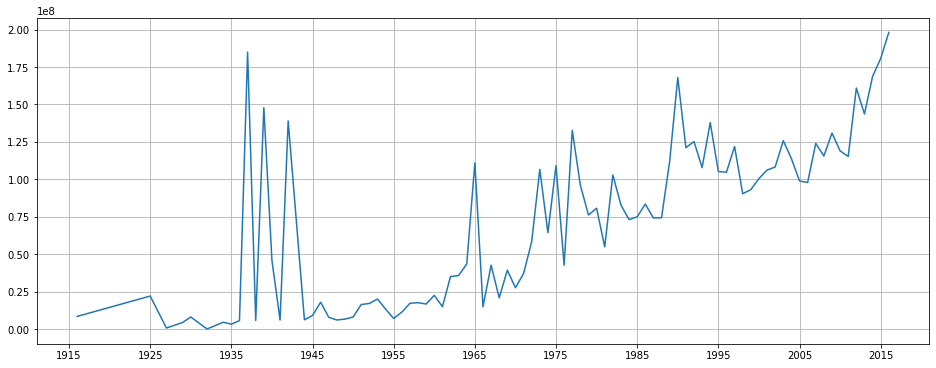

In [31]:
plt.figure(figsize=(16,6))
year_revenue = df[df['year'] != 'NaT'].groupby('year')['revenue'].mean()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1915, 2020, 10))
plt.grid()
plt.show()

The graph shows a continual upward trend as the years progress, likely due to inflation.  
However, there are many tall peaks/exceptions to this pattern. The highest performing year was 2016 but interestingly, the 2nd, 4th and 5th best performing years were somewhere between 1935 and 1945. Let's look at movies during that time period:

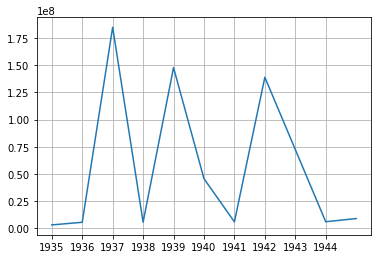

In [32]:
year_revenue = df[(df['year'] != 'NaT') & (df['year'] >= 1935) & (df['year'] <= 1945)].groupby('year')['revenue'].mean()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1935, 1945, 1))
plt.grid()
plt.show()

In [33]:
df[df['year']==1937][['title','budget','revenue']]

,title,budget,revenue
3208,Snow White and the Seven Dwarfs,1488423,184925486


In [34]:
df[df['year']==1939][['title','budget','revenue']]

,title,budget,revenue
2979,Gone with the Wind,4000000,400176459
3075,The Wizard of Oz,2777000,33754967
3188,Mr. Smith Goes to Washington,1500000,9600000


In [35]:
df[df['year']==1942][['title','budget','revenue']]

,title,budget,revenue
3232,Casablanca,878000,10462500
3276,Bambi,858000,267447150


Seeing the list of famous classics during that time period, it's no wonder that the 1930's was a successful year for the movie industry.  
However, it is also important to take note of the quantity of movies produced. For instance, the year 2005 took a slight dip in revenue. If we look at the quantity of movies produced that year, there were 151. Thus, it is likely that there was an oversaturation of low quality movies that produced lower revenue and consequently dragged down the average revenue for that year.

In [36]:
df[df['year']==2005][['title','budget','revenue']]

,title,budget,revenue
24,King Kong,207000000,550000000
63,"The Chronicles of Narnia: The Lion, the Witch ...",180000000,748806957
113,Harry Potter and the Goblet of Fire,150000000,895921036
116,Charlie and the Chocolate Factory,150000000,474968763
118,Batman Begins,150000000,374218673
...,...,...,...
3242,Cry_Wolf,1000000,10047674
3245,Transamerica,1000000,13350369
3273,Hard Candy,950000,7022209
3274,The Quiet,900000,381420


We could also take a look at the graphs of highest grossing movies over the years, and the quantity of movies produced over the years:

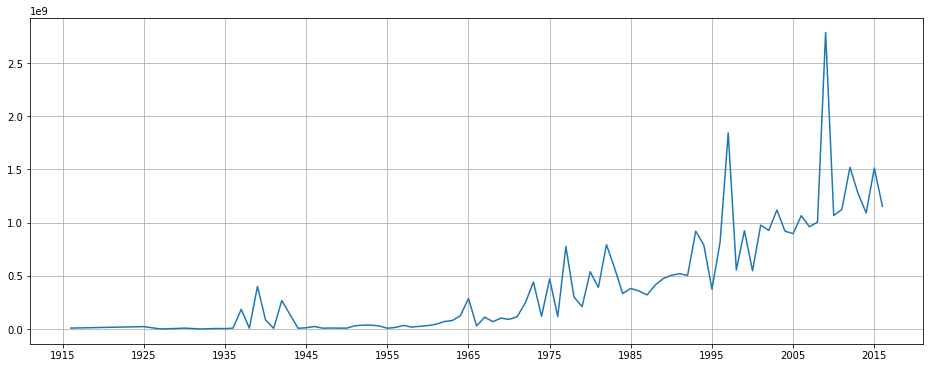

In [37]:
plt.figure(figsize=(16,6))
year_revenue = df[df['year'] != 'NaT'].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1915, 2020, 10))
plt.grid()
plt.show()

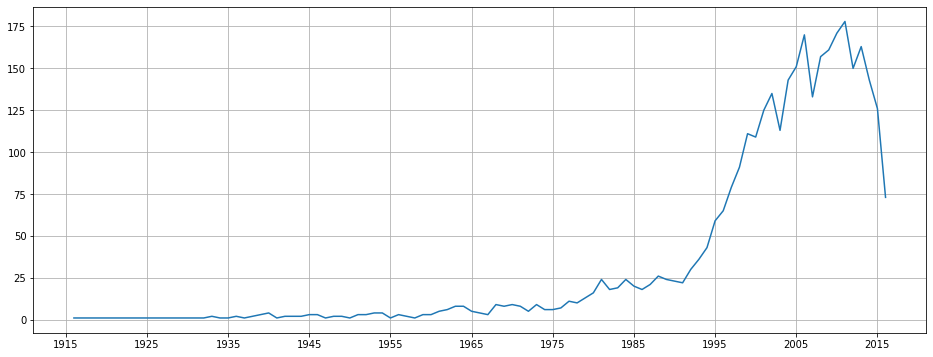

In [38]:
plt.figure(figsize=(16,6))
year_revenue = df[df['year'] != 'NaT'].groupby('year')['revenue'].count()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1915, 2020, 10))
plt.grid()
plt.show()

#### Pivot tables  
It might be interesting to look at numeric summaries of categorical variables and thus, how they affect a movie's revenue. 

In [39]:
df.columns

Index(['index', 'budget', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'tagline', 'title', 'vote_average', 'vote_count', 'genres', 'keywords',
       'production_companies', 'production_countries', 'year', 'month', 'date',
       'spoken_languages', 'cast', 'director', 'exec_prod', 'screenplay',
       'composer'],
      dtype='object')

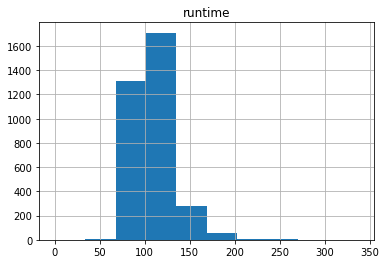

In [40]:
plt.hist(df['runtime'])
plt.title('runtime')
plt.grid()
plt.show()

In [41]:
df['budget_range'] = (np.select(
    condlist = [ df['budget']<=0.05e08, df['budget']<=0.1e08, df['budget']<=0.2e08, df['budget']<=0.3e08, df['budget']<=0.4e08, df['budget']<=0.5e08, df['budget']<=1e08, df['budget']>1e08], 
    choicelist = ['0-5mil', '5-10mil', '10-20mil', '20-30mil', '30-40mil', '40-50mil', '50-100mil', '>100mil'])
)
# df['budget_range'].value_counts()

In [42]:
pd.pivot_table(df, index = 'budget_range', values = 'revenue').sort_values(by = 'revenue', ascending= False)

,revenue
budget_range,
>100mil,4.860971e+08
50-100mil,1.835100e+08
40-50mil,1.176485e+08
30-40mil,9.765775e+07
20-30mil,7.733344e+07
10-20mil,6.116914e+07
5-10mil,3.873685e+07
0-5mil,2.391934e+07


In [43]:
df['runtime_range'] = (np.select(
    condlist = [df['runtime']<=90, df['runtime']<=100, df['runtime']<=110, df['runtime']<=120, df['runtime']<=130, df['runtime']<=140, df['runtime']<=150, df['runtime']<=200, df['runtime']>200],
    choicelist = ['<90min', '90-100min', '100-110min', '110-120min', '120-130min', '130-140min', '140-150min', '150-200min', '>200min'])
    )
# df['runtime_range'].value_counts()

In [44]:
pd.pivot_table(df, index = 'runtime_range', values = 'revenue').sort_values(by = 'revenue', ascending= False)

,revenue
runtime_range,
140-150min,2.894651e+08
150-200min,2.655346e+08
130-140min,1.695004e+08
>200min,1.622988e+08
120-130min,1.544558e+08
110-120min,1.049431e+08
100-110min,9.388432e+07
90-100min,8.858150e+07
<90min,7.720221e+07


In [45]:
df['century'] = (np.select(
    condlist = [df['year']<=1929, df['year']<=1939, df['year']<=1949, df['year']<=1959, df['year']<=1969, df['year']<= 1979, df['year']<=1989, df['year']<=1999, df['year']<=2009, df['year']>=2010],
    choicelist = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
    )
# df['century'].value_counts()

In [46]:
pd.pivot_table(df, index = 'century', values = 'revenue').sort_values(by = 'revenue', ascending= False)

,revenue
century,
2010s,1.491787e+08
2000s,1.120989e+08
1990s,1.096623e+08
1980s,8.077795e+07
1970s,7.790069e+07
1930s,4.795065e+07
1960s,3.777337e+07
1940s,2.963754e+07
1950s,1.535769e+07


In [47]:
pd.pivot_table(df, index = 'month', values = 'revenue').sort_values(by = 'revenue', ascending= False)

,revenue
month,
6.0,1.981227e+08
5.0,1.877090e+08
11.0,1.591548e+08
12.0,1.476146e+08
7.0,1.467477e+08
4.0,1.110501e+08
3.0,1.105462e+08
10.0,8.036168e+07
2.0,7.721994e+07


In [48]:
pd.pivot_table(df, index = 'date', values = 'revenue').sort_values(by = 'revenue', ascending= False)

,revenue
date,
25.0,1.475759e+08
18.0,1.424974e+08
28.0,1.397471e+08
20.0,1.372259e+08
10.0,1.360290e+08
19.0,1.317872e+08
30.0,1.316932e+08
14.0,1.304922e+08
23.0,1.254350e+08


- As expected, movies with a higher budget tend to generate more revenue  
- Movies that are longer tend to generate more revenue  
- As expected, movies that were released in more recent decades generated more revenue than older movies (keeping in mind inflation over the years).   
- Movies that were released during the Summer months (May, June, July) and the American holiday months (Nov, Dec) garnered higher revenue, which makes sense since people are probably watching more movies during vacation periods  
- In general, movies that are released later on in the month tend to produce more revenue. However, the differences are very small so date does not have a large impact on revenue  

For the sake of comparison of columns with lists as values (ex. genres, production_countries), we will create a new column to select only the first mentioned value and then create pivot tables against revenue.

In [49]:
from ast import literal_eval

In [50]:
df['genres'] = df['genres'].apply(literal_eval)

In [51]:
df['genre'] = df['genres'].apply(lambda x: x[0] if len(x) != 0 else np.nan)

In [52]:
pd.pivot_table(df, index = 'genre', values = 'revenue').sort_values(by = 'revenue', ascending= False)

,revenue
genre,
Animation,2.944274e+08
Adventure,2.440813e+08
Family,2.289083e+08
Science Fiction,1.997302e+08
Fantasy,1.779838e+08
Action,1.521250e+08
Mystery,1.014581e+08
Thriller,9.617794e+07
History,9.575792e+07


In [53]:
df['production_companies'] = df['production_companies'].apply(literal_eval)

In [54]:
df['production_company'] = df['production_companies'].apply(lambda x: x[0] if len(x) != 0 else np.nan)

In [55]:
pd.pivot_table(df, index = 'production_company', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(10)

,revenue
production_company,
Patalex IV Productions Limited,8.959210e+08
Marvel Studios,7.301826e+08
1492 Pictures,7.043868e+08
WingNut Films,6.709462e+08
Pixar Animation Studios,6.365889e+08
Blue Sky Studios,5.231317e+08
Lightstorm Entertainment,5.200000e+08
DreamWorks Animation,4.844850e+08
Lucasfilm,4.719098e+08


In [56]:
df['production_countries'] = df['production_countries'].apply(literal_eval)

In [57]:
df['production_country'] = df['production_countries'].apply(lambda x: x[0] if len(x) != 0 else np.nan)

In [58]:
pd.pivot_table(df, index = 'production_country', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(10)

,revenue
production_country,
Jamaica,5.626299e+08
New Zealand,4.568206e+08
Philippines,2.032776e+08
Czech Republic,1.966959e+08
Finland,1.854642e+08
China,1.774117e+08
Peru,1.703626e+08
Iceland,1.694938e+08
Japan,1.555062e+08


In [59]:
df['spoken_languages'] = df['spoken_languages'].apply(literal_eval)

In [60]:
df['spoken_language'] = df['spoken_languages'].apply(lambda x: x[0] if len(x) != 0 else np.nan)

In [61]:
pd.pivot_table(df, index = 'spoken_language', values = 'revenue').sort_values(by = 'revenue', ascending= False)

,revenue
spoken_language,
Română,4.239048e+08
Íslenska,3.722349e+08
Eesti,2.259910e+08
Latin,2.205174e+08
български език,2.194173e+08
עִבְרִית,2.061877e+08
Magyar,1.994788e+08
ελληνικά,1.612142e+08
Deutsch,1.511016e+08


- The highest revenue generating genres are Animation, Adventure and Family, while the lowest revenue genres are Music, Documentary and Foreign   
- Interestingly, some of the production companies producing the highest revenue movies are not that well-known (Palatex, 1492, WingNut)  
- Surprisingly, the US is not included in the top grossing production countries. This brings up the question of whether the revenue figures collected were all consistently recorded in US dollars.  
- The top grossing movies feature dialogue spoken in Romanian, Icelandic and Estonian - countries not widely known for their film industries. This could again be an issue with the consistency of the revenue currency.

Now let's look at the top grossing cast and crew members.

Recall the barchart we made of the top 30 actors who appeared in the most number of movies. Let's look at a similar barchart but for our new dataframe, where rows with missing revenue have been dropped:

In [62]:
cast_ser = df['cast'].apply(eval)
cast_unlisted = pd.Series([x for _list in cast_ser for x in _list])

graph of top 30 actors (for new dataframe)


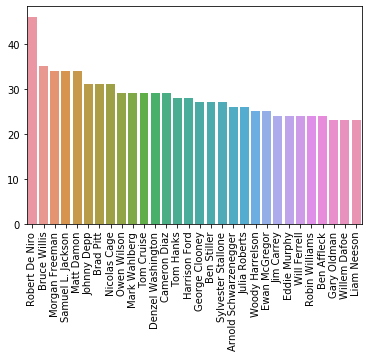

In [63]:
print("graph of top 30 actors (for new dataframe)")
# plt.figure(figsize=(16,6))
chart = sns.barplot(x = cast_unlisted.value_counts()[:30].index, 
                    y = cast_unlisted.value_counts()[:30])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

Now let's say we want to find the top 30 highest grossing actors.  
  
It would take way too much time to loop through all the movies that every single actor played in. Instead, I will take only the top 50 most featured actors, look at all the movies each of the top 50 actors played in and calculate their average revenue. Finally, I will take the 30 actors with the highest average revenue out of the top 50 most featured actors.

In [64]:
actors_list = cast_unlisted.value_counts()[:50].index.tolist()
zero_list = [0]*50

actors_dict = {'name': actors_list, 'num_movies': zero_list, 'total_revenue': zero_list}

actors_df = pd.DataFrame(actors_dict)

In [65]:
df['cast'] = df['cast'].apply(literal_eval)

In [66]:
for i in actors_list:
    for j in range(len(df)):
        if i in df.cast[j]:
            actors_df.loc[actors_df.name == i,'num_movies'] += 1
            actors_df.loc[actors_df.name == i,'total_revenue'] += df.revenue[j]

In [67]:
actors_df['avg_revenue'] = actors_df['total_revenue'] / actors_df['num_movies']

In [68]:
actors_df.sort_values('avg_revenue', ascending = False)

,name,num_movies,total_revenue,avg_revenue
10,Tom Cruise,29,8430235163,2.906978e+08
13,Tom Hanks,28,7886617241,2.816649e+08
42,Angelina Jolie,22,5689373477,2.586079e+08
27,Gary Oldman,23,5842612199,2.540266e+08
5,Johnny Depp,31,7874365082,2.540118e+08
40,Cate Blanchett,22,5498767317,2.499440e+08
23,Eddie Murphy,24,5746369845,2.394321e+08
12,Cameron Diaz,29,6921136082,2.386599e+08
16,Ben Stiller,27,6195281455,2.294549e+08
14,Harrison Ford,28,6332004691,2.261430e+08


Of the 50 most common actors, the top grossing actors are Tom Cruise, Tom Hanks and Angelina Jolie, whose movies rake in an impressive upwards of 250 million dollars each.  

Now we can check out the top grossing crew members:

In [69]:
pd.pivot_table(df, index = 'director', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(10)

,revenue
director,
Chris Buck,1.274219e+09
Kyle Balda,1.156731e+09
Lee Unkrich,1.066970e+09
Joss Whedon,9.879437e+08
Chris Renaud,8.759583e+08
James Cameron,8.405099e+08
Roger Allers,7.882418e+08
Tim Miller,7.831130e+08
Colin Trevorrow,7.587683e+08


In [70]:
pd.pivot_table(df, index = 'exec_prod', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(10)

,revenue
exec_prod,
Laeta Kalogridis,1.614284e+09
Chris Morgan,1.506249e+09
Chris Renaud,1.156731e+09
Rae Sanchini,1.111958e+09
Terry Rossio,1.045714e+09
Callum McDougall,9.946178e+08
Peter M. Tobyansen,9.665506e+08
Carolyn Blackwood,9.560198e+08
Lionel Wigram,9.339592e+08


In [71]:
pd.pivot_table(df, index = 'screenplay', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(10)

,revenue
screenplay,
Jennifer Lee,1.274219e+09
Rick Jaffa,9.981945e+08
James Cameron,9.309331e+08
Steve Kloves,8.945698e+08
Michael Berg,8.819658e+08
Pete Docter,8.576112e+08
Rhett Reese,7.831130e+08
Alvin Sargent,7.679911e+08
Bob Peterson,7.350991e+08


In [72]:
pd.pivot_table(df, index = 'composer', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(10)

,revenue
composer,
Nicholas Hooper,9.360860e+08
Benny Andersson,6.098416e+08
Heitor Pereira,5.639110e+08
Joe Kraemer,4.503354e+08
Claude-Michel Schönberg,4.418098e+08
Steve Boeddeker,4.413061e+08
Michael Giacchino,4.118638e+08
John Williams,3.878392e+08
Walter Murphy,3.831955e+08


The top grossing crew members also feature some distinguished names such as Joss Whedon, James Cameron and Michael Giacchino.

## Additional Feature Engineering Before Putting Data in Model

In [73]:
df.columns

Index(['index', 'budget', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'tagline', 'title', 'vote_average', 'vote_count', 'genres', 'keywords',
       'production_companies', 'production_countries', 'year', 'month', 'date',
       'spoken_languages', 'cast', 'director', 'exec_prod', 'screenplay',
       'composer', 'budget_range', 'runtime_range', 'century', 'genre',
       'production_company', 'production_country', 'spoken_language'],
      dtype='object')

In [74]:
# create a new field to store the length of the movie overview
df['overview_length'] = df['overview'].apply(lambda x: len(x))

In [75]:
# create a new field to store the number of spoken language
df['num_spoken_languages'] = df['spoken_languages'].apply(lambda x: len(x))

Now we want to create additional fields which contain a boolean value stating whether a movie contains any of the top 30 highest grossing actors / directors / executive producers / screenplays / composers / production companies / production countries.

In [76]:
# get the list of top 30 highest grossing actors
top30_actors = actors_df.sort_values('avg_revenue', ascending = False).name[:30]

In [77]:
# create a field whose value is a boolean that says whether the cast list contains any of the top 30 highest grossing actors
# 1 for yes, 0 for no
df['top30cast_yn'] = df['cast'].apply(lambda x: 1 if (set(top30_actors).intersection(set(x)) == set()) else 0 )

In [78]:
df['top30cast_yn'].value_counts()

1    2700
0     676
Name: top30cast_yn, dtype: int64

Do the same for the other variables:

In [79]:
top100dir = pd.pivot_table(df, index = 'director', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(100).index.tolist()
df['top100directors_yn'] = df['director'].apply(lambda x: 1 if x in top100dir else 0 )
df['top100directors_yn'].value_counts()

0    3051
1     325
Name: top100directors_yn, dtype: int64

In [80]:
top100execprod = pd.pivot_table(df, index = 'exec_prod', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(100).index.tolist()
df['top100exec_prod_yn'] = df['director'].apply(lambda x: 1 if x in top100execprod else 0 )
df['top100exec_prod_yn'].value_counts()

0    3260
1     116
Name: top100exec_prod_yn, dtype: int64

In [81]:
top100screenplay = pd.pivot_table(df, index = 'screenplay', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(100).index.tolist()
df['top100screenplays_yn'] = df['screenplay'].apply(lambda x: 1 if x in top100screenplay else 0 )
df['top100screenplays_yn'].value_counts()

0    3147
1     229
Name: top100screenplays_yn, dtype: int64

In [82]:
top100comp = pd.pivot_table(df, index = 'composer', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(100).index.tolist()
df['top100composers_yn'] = df['composer'].apply(lambda x: 1 if x in top100comp else 0 )
df['top100composers_yn'].value_counts()

0    2537
1     839
Name: top100composers_yn, dtype: int64

In [83]:
top100prod_comp = pd.pivot_table(df, index = 'production_company', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(100).index.tolist()
df['top100prod_comp_yn'] = df['production_company'].apply(lambda x: 1 if x in top100prod_comp else 0 ) 
df['top100prod_comp_yn'].value_counts()

0    1882
1    1494
Name: top100prod_comp_yn, dtype: int64

In [84]:
top15prod_country = pd.pivot_table(df, index = 'production_country', values = 'revenue').sort_values(by = 'revenue', ascending= False).head(15).index.tolist()
df['top15prod_country_yn'] = df['production_country'].apply(lambda x: 1 if x in top15prod_country else 0 ) 
df['top15prod_country_yn'].value_counts()

1    2927
0     449
Name: top15prod_country_yn, dtype: int64

Now we save our dataframe with the added features, then we can use them to build a predictive model and a movie recommender system.

In [85]:
df.to_csv('movies_post_eda.csv', index = False)